In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
path = "/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Datasets/Bmi_male_female.csv"

In [22]:
data = pd.read_csv(path)
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [23]:
data.isnull()

,Gender,Height,Weight,Index
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [25]:
data.Gender[data.Gender=="Male"]=0
data.Gender[data.Gender=="Female"]=1
data["Gender"] = pd.to_numeric(data["Gender"])

/home/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
data.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [27]:
X=data.iloc[:,0:3]
Y=data.iloc[:,3]

In [28]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [29]:
print("XTrain SHAPE: ",XTrain.shape)
print("XTest SHAPE: ",XTest.shape)
print("YTrain SHAPE: ",YTrain.shape)
print("YTest SHAPE: ",YTest.shape)
YTrain = YTrain.values.reshape(350,1)
YTest = YTest.values.reshape(150,1)
print("--------------")
print("YTrain SHAPE: ",YTrain.shape)
print("YTest SHAPE: ",YTest.shape)

XTrain SHAPE:  (350, 3)
XTest SHAPE:  (150, 3)
YTrain SHAPE:  (350,)
YTest SHAPE:  (150,)
--------------
YTrain SHAPE:  (350, 1)
YTest SHAPE:  (150, 1)


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
teacher = RandomForestClassifier()

In [32]:
learner = teacher.fit(XTrain,YTrain)

/home/anmol/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anmol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [33]:
teacher.fit(XTrain,YTrain.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
Index_Name=pd.Series(["Extremely Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])
Index_Name

0     Extremely Weak
1               Weak
2             Normal
3         Overweight
4            Obesity
5    Extreme Obesity
dtype: object

In [35]:
p=learner.predict([[1,50,358]])
Index_Name[p]

5    Extreme Obesity
dtype: object

In [36]:
YPred = learner.predict(XTest)

In [37]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(YTest,YPred)*100
accScore

86.0

Text(0, 0.5, 'Index')

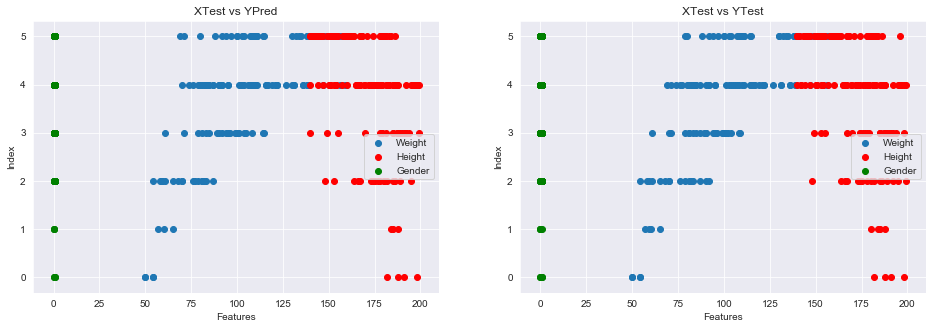

In [38]:
sns.set_style('darkgrid')
f,axes = plt.subplots(1,2,figsize=(16,5))
axes[0].scatter(XTest['Weight'],YPred)
axes[0].scatter(XTest['Height'],YPred,color='red')
axes[0].scatter(XTest['Gender'],YPred,color='green')
axes[0].set_title('XTest vs YPred')
axes[0].legend(["Weight","Height","Gender"])
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Index')

axes[1].scatter(XTest['Weight'],YTest)
axes[1].scatter(XTest['Height'],YTest,color='red')
axes[1].scatter(XTest['Gender'],YTest,color='green')
axes[1].set_title('XTest vs YTest')
axes[1].legend(["Weight","Height","Gender"])
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Index')


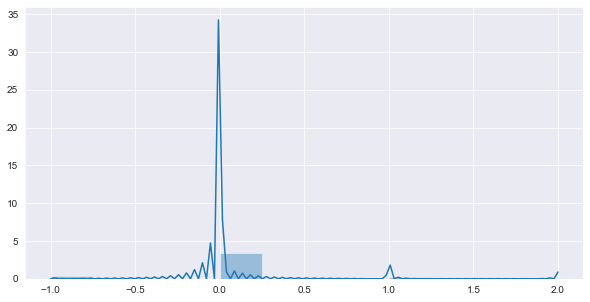

In [39]:
plt.figure(figsize=(10,5))
sns.distplot((YTest.reshape(-1,)-YPred.reshape(-1,)))


Text(0.5, 1.0, 'RANDOM FOREST DECISION BOUNDARY')

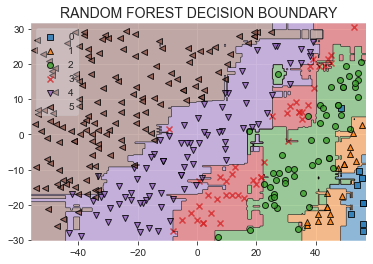

In [40]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(XTrain)
teacher.fit(X_train2,YTrain.ravel())
plot_decision_regions(X_train2, YTrain.ravel(), clf=teacher, legend=2)
plt.title("RANDOM FOREST DECISION BOUNDARY",size = 14)
